In [279]:
%reset -f
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
import plotly.graph_objects as go
from plotly.subplots import make_subplots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
df = pd.read_csv('dataset.csv')
df.head(20)


,ID,Year,Market share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales
0,1,2013,0.000000,Aiways,U5,400,0.000,201,34,SUV,C,CN,0
1,1,2014,0.000000,Aiways,U5,400,0.000,201,34,SUV,C,CN,0
2,1,2015,0.000000,Aiways,U5,400,0.000,201,34,SUV,C,CN,0
3,1,2016,0.000000,Aiways,U5,400,0.000,201,34,SUV,C,CN,0
4,1,2017,0.000000,Aiways,U5,400,0.000,201,34,SUV,C,CN,0
5,1,2018,0.000000,Aiways,U5,400,0.000,201,34,SUV,C,CN,0
6,1,2019,0.000000,Aiways,U5,400,0.000,201,34,SUV,C,CN,0
7,1,2020,0.000000,Aiways,U5,400,0.000,201,34,SUV,C,CN,0
8,1,2021,0.010373,Aiways,U5,400,284621.700,201,34,SUV,C,CN,257
9,1,2022,0.005976,Aiways,U5,400,313681.829,201,34,SUV,C,CN,183


In [281]:
data = df[df['Market share'] != 0]
data.head(20)

,ID,Year,Market share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales
8,1,2021,0.010373,Aiways,U5,400,284621.700,201,34,SUV,C,CN,257
9,1,2022,0.005976,Aiways,U5,400,313681.829,201,34,SUV,C,CN,183
10,1,2023,0.002860,Aiways,U5,400,264524.000,201,34,SUV,C,CN,177
21,2,2023,0.000048,Aiways,U6,405,360638.000,214,34,SUV,C,CN,3
28,3,2019,0.040630,Audi,e-tron,375,979704.475,402,17,SUV,F,DE,222
29,3,2020,0.034680,Audi,e-tron,375,890101.410,402,17,SUV,F,DE,491
30,3,2021,0.010494,Audi,e-tron,375,800035.193,402,17,SUV,F,DE,260
31,3,2022,0.017570,Audi,e-tron,375,789723.656,402,17,SUV,F,DE,538
32,3,2023,0.001099,Audi,e-tron,375,673037.728,402,17,SUV,F,DE,68
41,4,2021,0.003391,Audi,e-tron GT,472,1278896.110,522,17,Sedan,F,DE,84


# Statistics

## Average per year

In [282]:
# Group the data by year
grouped_data = data.groupby('Year')

# Calculate the required statistics
desc_stats = grouped_data.agg({
    'Model': pd.Series.nunique,  # number of unique models
    'Sales': 'sum',  # sum of count
    'Price': 'mean',  # average price
    'Range': 'mean',  # average range
    'HP': 'mean',  # average hp
    'Chargetime': 'mean'  # average charge time
})

# Rename the columns
desc_stats.columns = ['Number of Unique Models', 'Sales', 'Average Price', 'Average Range', 'Average HP', 'Average Charge Time']

# Print the descriptive statistics table
print(desc_stats)


      Number of Unique Models  Sales  Average Price  Average Range  \
Year                                                                 
2013                        6    447  296770.419877     330.000000   
2014                        6   1485  310058.947710     347.166667   
2015                        7   3942  321165.598038     361.857143   
2016                        8   1190  458294.975000     382.750000   
2017                        9    650  453467.325000     374.666667   
2018                       11   1467  475000.854545     389.090909   
2019                       16   5464  481717.118813     386.500000   
2020                       33  14158  423285.467182     359.333333   
2021                       57  24775  445642.696800     384.438596   
2022                       81  30621  507474.479558     402.222222   
2023                      100  61885  496384.861756     421.740000   

      Average HP  Average Charge Time  
Year                                   
2013  214

### Total average

In [283]:
# Calculate the required statistics
total_unique_models = data['Model'].nunique()
total_count = data['Sales'].sum()
average_sales_per_model = total_count / total_unique_models
average_price = data['Price'].mean()
average_range = data['Range'].mean()
average_hp = data['HP'].mean()
average_charge_time = data['Chargetime'].mean()

# Create the DataFrame
desc_stats = pd.DataFrame({
    'Total Unique Models': [total_unique_models],
    'Total Sales': [total_count],
    'Average Sales per model': [average_sales_per_model],
    'Average Price': [average_price],
    'Average Range': [average_range],
    'Average HP': [average_hp],
    'Average Chargetime': [average_charge_time]
})

# Print the descriptive statistics table
print(desc_stats)


   Total Unique Models  Total Sales  Average Sales per model  Average Price  \
0                  107       146084              1365.271028  469111.250216   

   Average Range  Average HP  Average Chargetime  
0     395.266467  252.751497           34.161677  


## Sales-weighted average

In [284]:
# Group the data by year
grouped_data = data.groupby('Year')

# Calculate the required statistics
desc_stats = grouped_data.agg({
    'Model': pd.Series.nunique,  # number of unique models
    'Sales': ['sum'],  # sum of sales per model
    'Price': lambda x: np.average(x, weights=data.loc[x.index, 'Sales']),  # sales-weighted average price
    'Range': lambda x: np.average(x, weights=data.loc[x.index, 'Sales']),  # sales-weighted average range
    'HP': lambda x: np.average(x, weights=data.loc[x.index, 'Sales']),  # sales-weighted average HP
    'Chargetime': lambda x: np.average(x, weights=data.loc[x.index, 'Sales'])  # sales-weighted average charge time
})

# Rename the columns
desc_stats.columns = ['Number of Unique Models', 'Sales',
                      'Sales Weighted Average Price', 'Sales Weighted Average Range', 
                      'Sales Weighted Average HP', 'Sales Weighted Average Charge Time']

# Print the descriptive statistics table
print(desc_stats)

      Number of Unique Models  Sales  Sales Weighted Average Price  \
Year                                                                 
2013                        6    447                 348373.092344   
2014                        6   1485                 363124.700251   
2015                        7   3942                 573531.215995   
2016                        8   1190                 375604.406050   
2017                        9    650                 383234.055462   
2018                       11   1467                 328732.444649   
2019                       16   5464                 432898.014253   
2020                       33  14158                 421266.359033   
2021                       57  24775                 401596.162755   
2022                       81  30621                 467262.704107   
2023                      100  61885                 436564.177553   

      Sales Weighted Average Range  Sales Weighted Average HP  \
Year                    

### Total sales-weighted average

In [285]:
# Calculate the total sales-weighted means
total_sales_weighted_average_price = np.average(data['Price'], weights=data['Sales'])
total_sales_weighted_average_range = np.average(data['Range'], weights=data['Sales'])
total_sales_weighted_average_hp = np.average(data['HP'], weights=data['Sales'])
total_sales_weighted_average_charge_time = np.average(data['Chargetime'], weights=data['Sales'])

# Print the results
print("Total Sales Weighted Average Price:", total_sales_weighted_average_price)
print("Total Sales Weighted Average Range:", total_sales_weighted_average_range)
print("Total Sales Weighted Average HP:", total_sales_weighted_average_hp)
print("Total Sales Weighted Average Charge Time:", total_sales_weighted_average_charge_time)


Total Sales Weighted Average Price: 436311.70466856
Total Sales Weighted Average Range: 464.69727690917557
Total Sales Weighted Average HP: 300.61758987979516
Total Sales Weighted Average Charge Time: 30.611969825579802


In [286]:
# calculate the average sales per model per year
average_sales_per_model_per_year = data.groupby(['Year'])['Sales'].mean()
average_sales_per_model_per_year


Year
2013     74.500000
2014    247.500000
2015    563.142857
2016    148.750000
2017     72.222222
2018    133.363636
2019    341.500000
2020    429.030303
2021    434.649123
2022    378.037037
2023    618.850000
Name: Sales, dtype: float64

In [287]:
# Create a groupby object to sum sales by year
sales_by_year = df.groupby('Year')['Sales'].sum()

# Convert the groupby object to a DataFrame
sales_by_year_df = pd.DataFrame(sales_by_year).reset_index()

sales_by_year_df

,Year,Sales
0,2013,447
1,2014,1485
2,2015,3942
3,2016,1190
4,2017,650
5,2018,1467
6,2019,5464
7,2020,14158
8,2021,24775
9,2022,30621


# Quartiles

In [288]:
# Variables to calculate quartiles for
variables = ['Sales', 'Price', 'Range', 'Chargetime', 'HP']
copy_df = df.copy()

for variable in variables:
    # Calculate quartiles for the variable
    quartiles = data[variable].describe(percentiles=[0, 0.25, 0.5, 0.75, 1.0])
    
    # Find the rows corresponding to each quartile
    quartile_rows = {}
    for quartile in ['0%', '25%', '50%', '75%', '100%']:
        if quartile == '0%':
            value = quartiles['min']
        elif quartile == '100%':
            value = quartiles['max']
        else:
            if quartiles[quartile] in data[variable].values:
                value = quartiles[quartile]
            else:
                value = data[variable].iloc[(data[variable]-quartiles[quartile]).abs().argsort()[:1]].values[0]
        quartile_rows[quartile] = data[data[variable] == value]
    
    # Create a DataFrame to store the quartiles along with the associated manufacturer and model
    quartiles_df = pd.DataFrame(columns=['Variable', 'Quartile', 'Year', 'Manufacturer', 'Model', variable])
    for quartile, copy_df in quartile_rows.items():
        quartiles_df = pd.concat([quartiles_df, copy_df[['Year', 'Manufacturer', 'Model', variable]].assign(Variable=variable, Quartile=quartile)])

    # Define the desired order of quartiles
    quartile_order = ['0%', '25%', '50%', '75%', '100%']

    # Convert the 'Quartile' column to a categorical type with the desired order
    quartiles_df['Quartile'] = pd.Categorical(quartiles_df['Quartile'], categories=quartile_order, ordered=True)

    # Drop duplicates for 'Range', 'Chargetime', and 'HP' while keeping 'Sales' and 'Price' unchanged
    if variable in ['Range', 'Chargetime', 'HP']:
        quartiles_df.drop_duplicates(subset=['Manufacturer', 'Model', 'Variable', 'Quartile'], inplace=True)
    else:
        quartiles_df.drop_duplicates(inplace=True)

    # Sort the DataFrame by quartile
    quartiles_df.sort_values(by='Quartile', inplace=True)

    print(f"Quartiles of {variable} Distribution with Manufacturer and Model")
    print(quartiles_df)
    print()


Quartiles of Sales Distribution with Manufacturer and Model
     Variable Quartile  Year   Manufacturer           Model  Sales
66      Sales       0%  2013            BMW              I3      1
1141    Sales       0%  2021          Volvo             C40      1
1066    Sales       0%  2023     Volkswagen            Golf      1
1065    Sales       0%  2022     Volkswagen            Golf      1
998     Sales       0%  2021          Tesla         Model S      1
953     Sales       0%  2020          Smart          Fortwo      1
1009    Sales       0%  2021          Tesla         Model X      1
778     Sales       0%  2021           Opel           Combo      1
315     Sales       0%  2020           Ford  Mustang Mach-E      1
174     Sales       0%  2022            BYD             Han      1
76      Sales       0%  2023            BMW              I3      1
946     Sales       0%  2013          Smart          Fortwo      1
1010    Sales      25%  2022          Tesla         Model X     25
61

# Graphs

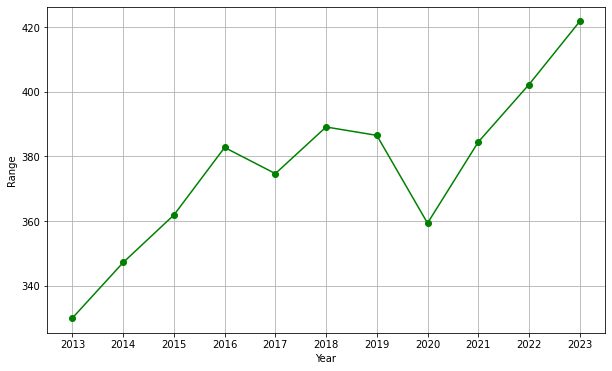

In [289]:
# Group by Year and calculate mean range
range_by_year = data.groupby('Year')['Range'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range_by_year['Year'], range_by_year['Range'], marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Range')
plt.grid(True)
plt.xticks(data['Year'].unique())
plt.show()

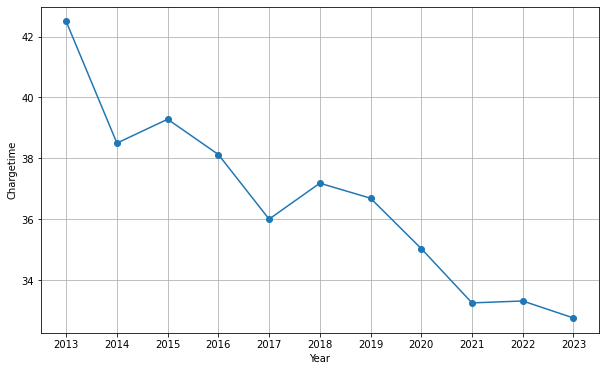

In [290]:
# Group by Year and calculate mean range
chargetime_by_year = data.groupby('Year')['Chargetime'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(chargetime_by_year['Year'], chargetime_by_year['Chargetime'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Chargetime')
plt.grid(True)
plt.xticks(data['Year'].unique())
plt.show()

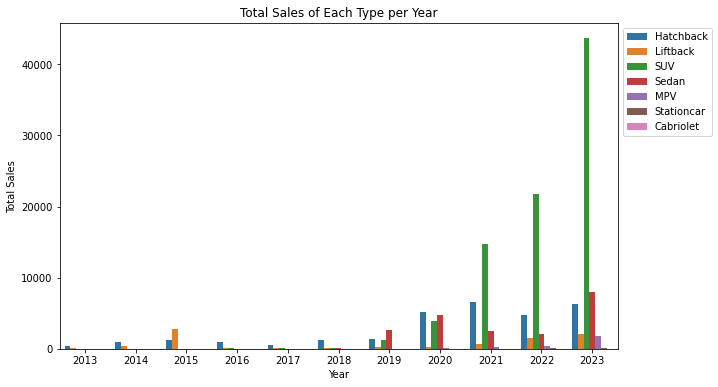

In [291]:
# Group the data by Year and Type and calculate the sum of Sales
grouped_data = data.groupby(['Year', 'Type'])['Sales'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Type', data=grouped_data)
plt.title('Total Sales of Each Type per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


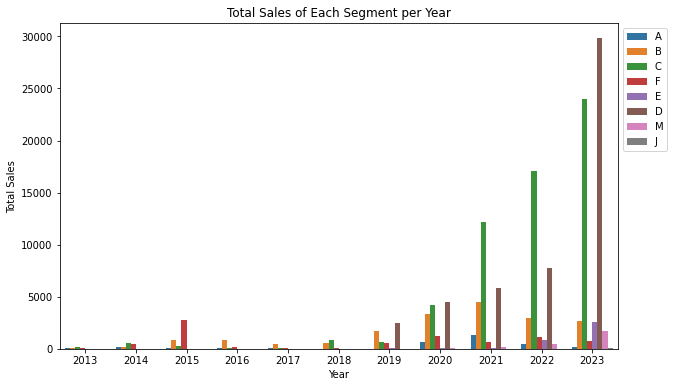

In [292]:
# Group the data by Year and Type and calculate the sum of Sales
grouped_data = data.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Segment', data=grouped_data)
plt.title('Total Sales of Each Segment per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [293]:
# Group the data by Year and get the model with maximum sales each year
most_sold_car_each_year = data.groupby('Year')['Sales'].idxmax()
most_sold_car_each_year_df = data.loc[most_sold_car_each_year]
most_sold_car_each_year_df

,ID,Year,Market share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales
759,132,2013,0.472036,Nissan,Leaf,328,253690.0,147,43,Hatchback,C,JP,211
760,132,2014,0.388552,Nissan,Leaf,328,253690.0,147,43,Hatchback,C,JP,577
992,173,2015,0.691273,Tesla,Model S,609,718250.0,675,30,Liftback,F,US,2725
905,158,2016,0.514286,Renault,Zoe,365,258205.2,134,56,Hatchback,B,FR,612
906,158,2017,0.595385,Renault,Zoe,365,258205.2,134,56,Hatchback,B,FR,387
764,132,2018,0.434219,Nissan,Leaf,328,296943.5,147,43,Hatchback,C,JP,637
985,172,2019,0.446376,Tesla,Model 3,542,437753.3,278,25,Sedan,D,US,2439
986,172,2020,0.302091,Tesla,Model 3,542,442589.3,278,25,Sedan,D,US,4277
1086,183,2021,0.107730,Volkswagen,ID.4,502,409920.0,281,28,SUV,C,DE,2669
944,165,2022,0.079357,Skoda,Enyaq iV,496,434204.2,281,28,SUV,C,CZ,2430


In [294]:
# Define a custom aggregation function
def regions(country):
    if country in ['DE', 'FR', 'DK', 'IT', 'RO', 'CZ', 'ES', 'SE']:
        return 'EU'
    elif country in ['JP', 'KR']:
        return 'Asia'
    elif country in ['CN']:
        return 'China'
    else:
        return country

# Apply the function to the 'Country' column
data['Region'] = data['Country'].apply(regions)

/var/folders/84/nl1t_q050914klynvps92vkc0000gn/T/ipykernel_33844/4232239934.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [295]:
# Define the color of regions
color_region = {'China': 'red', 'US': 'black', 'Asia': 'green', 'GB': 'brown', 'EU': 'blue'}

# Define the color of countries
color_country = {'CN': 'red', 'US': 'black', 'DE': 'aqua', 'FR': 'blue', 'ES': 'orange', 'RO': 'purple', 'IT': 'green', 'DK': 'grey', 'JP': 'pink', 'KR': 'violet', 'GB': 'brown', 'SE': 'yellow', 'CZ': 'olive'}


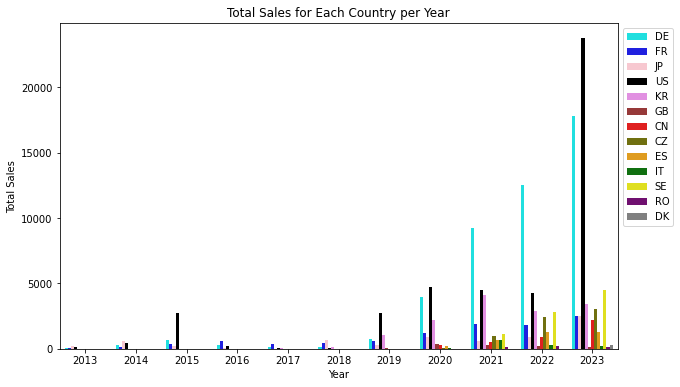

In [296]:
# Group the data by Year and Country and calculate the sum of Sales
grouped_data = data.groupby(['Year', 'Country'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Country', data=grouped_data, palette=color_country)
plt.title('Total Sales for Each Country per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




In [297]:
# Sort the 'data' DataFrame by 'Year'
data_sorted = data.sort_values(by='Year')

In [298]:
# Get unique years
years = data_sorted['Year'].unique()

# Calculate the number of pie charts per line
num_charts_per_line = (len(years) + 1) // 2  # Round up to ensure half the charts are on each line

# Create subplots with two rows and the calculated number of columns
fig = make_subplots(rows=2, cols=num_charts_per_line, specs=[[{'type':'domain'}] * num_charts_per_line] * 2)


# Iterate over each year
for i, year in enumerate(years, start=1):
    # Calculate the row and column indices for the current chart
    row_index = (i - 1) // num_charts_per_line + 1  # Divide by the number of charts per line and round up
    col_index = (i - 1) % num_charts_per_line + 1
    
    # Filter data for the current year
    year_data = data_sorted[data_sorted['Year'] == year]
    
    # Group the data by region and sum up the sales
    sales_by_region = year_data.groupby('Region')['Sales'].sum().reset_index()
    
    # Add a pie chart trace for the current year
    pie_trace = go.Pie(
        labels=sales_by_region['Region'], 
        values=sales_by_region['Sales'], 
        scalegroup='one', 
        name=f"{year}",
        marker=dict(colors=[color_region[region] for region in sales_by_region['Region']]),
        textinfo='label+percent',
        hoverinfo='label+value+name'  # Include value of sales in the hover info
    )
    
    fig.add_trace(pie_trace, row=row_index, col=col_index)

# Update layout
fig.update_layout(title_text='Market share in the Danish EV market by region and year')

fig.show()


# Save the plots by following:

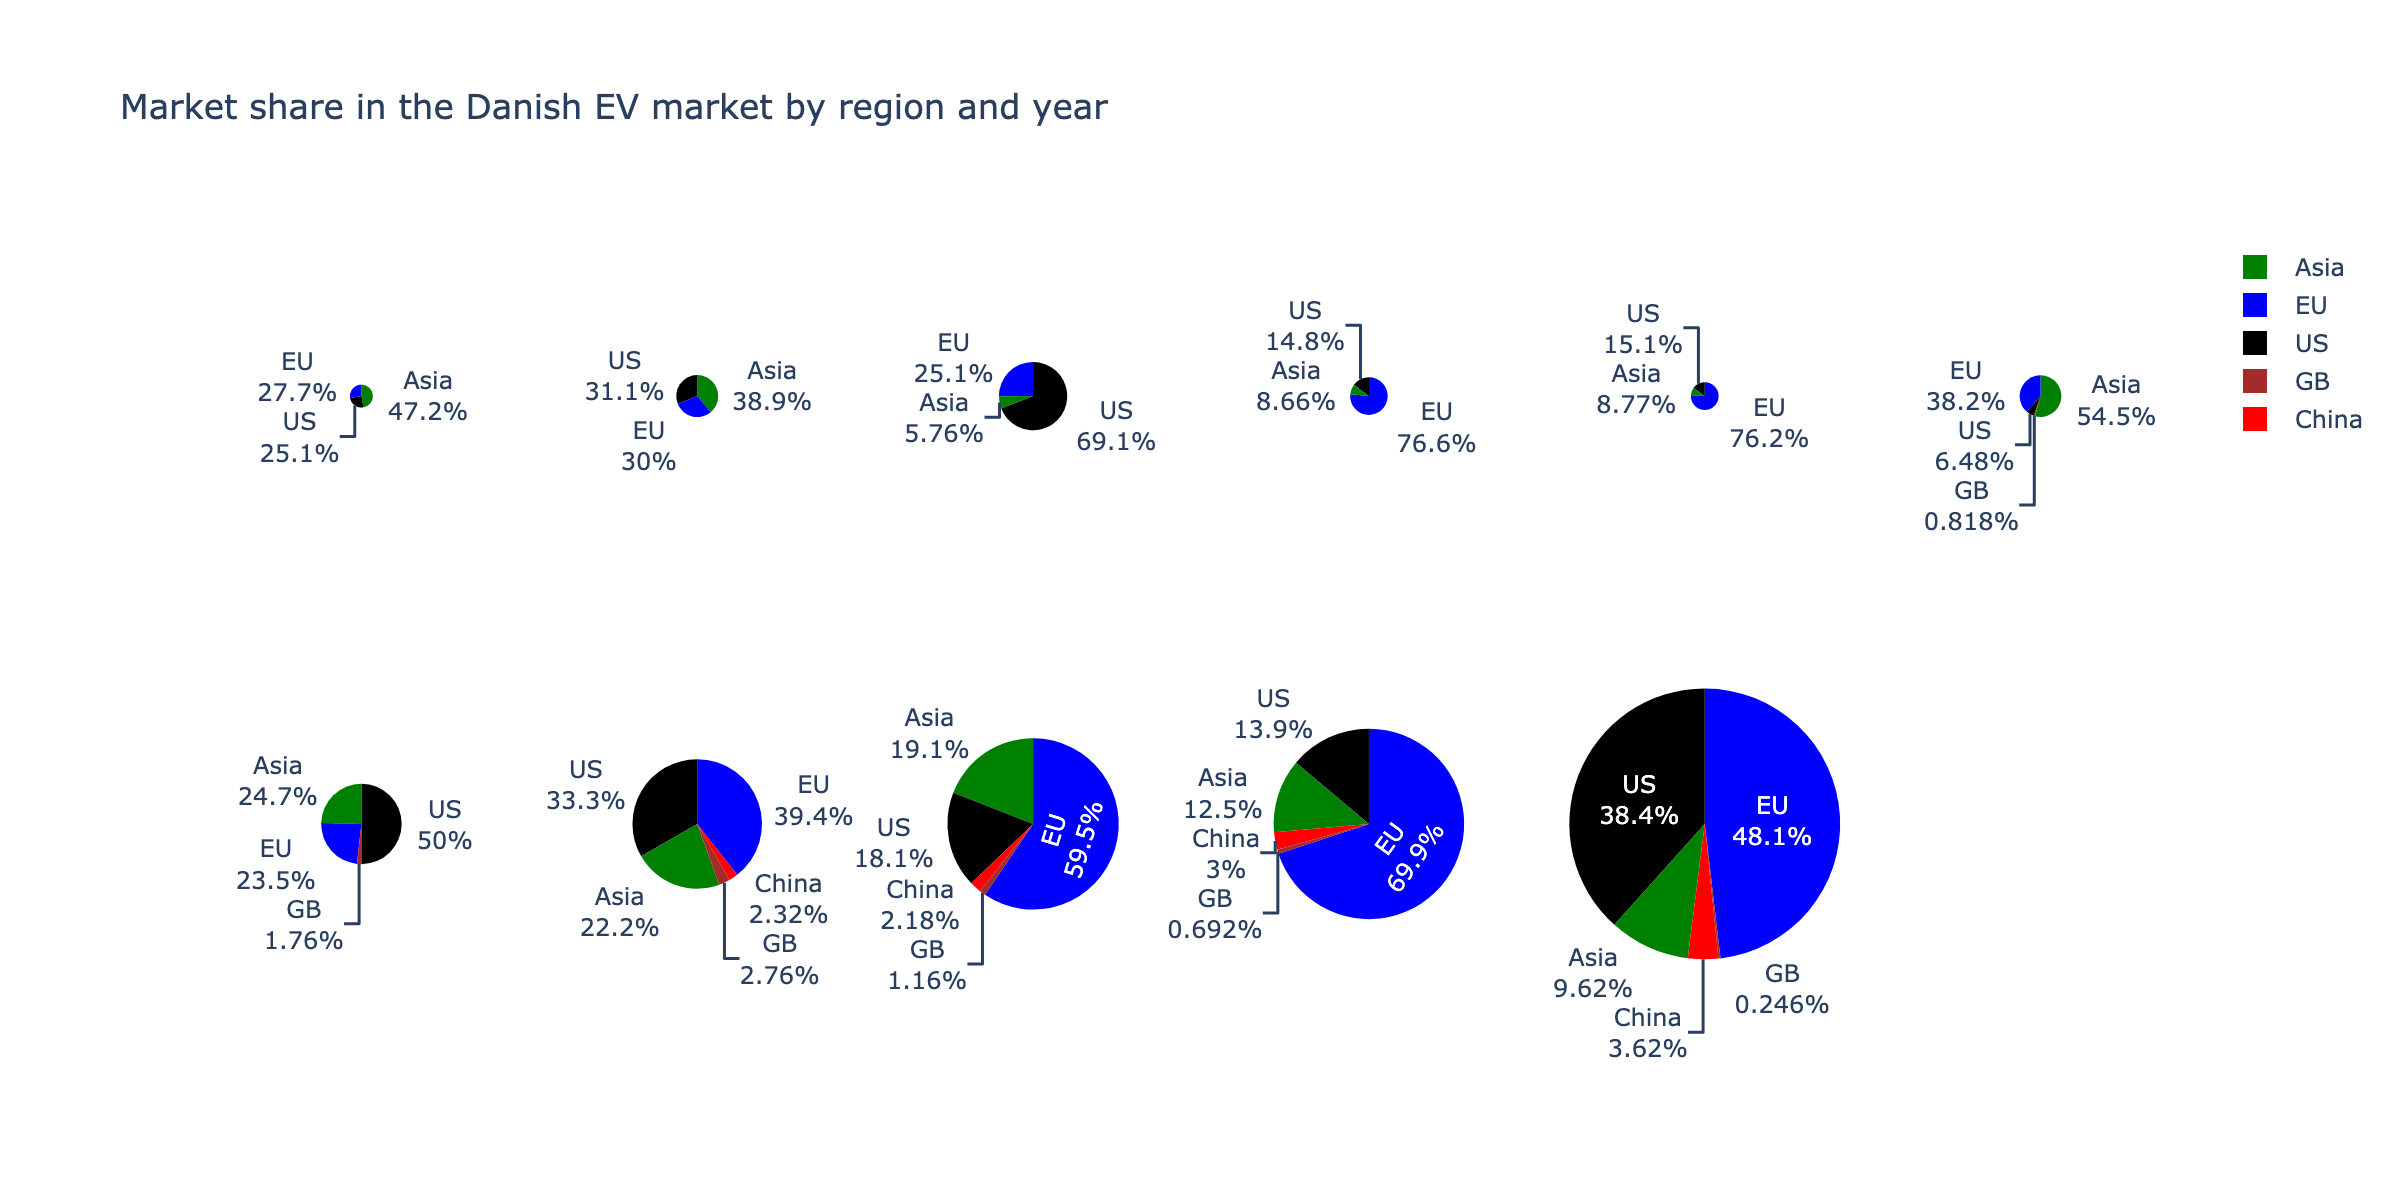

In [299]:
# Save the plot as an HTML file
#fig.write_html("interactive_plot.html")

# Print the HTML code to embed into LaTeX
#print(f"<iframe src='interactive_plot.html' width='1200' height='800'></iframe>")

img_bytes = fig.to_image(format="png", width=1200, height=600, scale=2)
Image(img_bytes)

# TEST

In [300]:
# Initialize empty lists to store subplot traces
fig1 = go.Figure()
fig2 = go.Figure()

# Filter data for the first half of the years (2013-2018)
first_half_data = data_sorted[data_sorted['Year'].between(2013, 2018)]

# Filter data for the second half of the years (2019-2023)
second_half_data = data_sorted[data_sorted['Year'].between(2019, 2023)]

# Iterate over each region
for region in data['Region'].unique():
    # Filter data for the current region in the first half of the years
    region_first_half_data = first_half_data[first_half_data['Region'] == region]
    
    # Grouping data by 'Year' and summing up the 'Sales' column
    year_sales_first_half = region_first_half_data.groupby('Year')['Sales'].sum().reset_index()

    # Extracting years and number of cars sold for the first half
    x1 = year_sales_first_half['Year'].tolist()
    y1 = year_sales_first_half['Sales'].tolist()

    # Find the top-selling car in each year for the first half
    top_models_first_half = region_first_half_data.loc[region_first_half_data.groupby('Year')['Sales'].idxmax()][['Year', 'Manufacturer', 'Model', 'Sales']]

    # Create text labels for the first half
    text_labels1 = [f"{row['Manufacturer']} {row['Model']} ({row['Sales']} cars)" for index, row in top_models_first_half.iterrows()]

    # Create a bar trace for the first half with specified color
    trace1 = go.Bar(
        x=x1, 
        y=y1,
        text=text_labels1,
        textposition='auto',
        name=region,
        hoverinfo='text',
        marker=dict(color=color_region[region])  # Assign color based on region
    )

    # Add the trace to the first figure
    fig1.add_trace(trace1)
    
    # Filter data for the current region in the second half of the years
    region_second_half_data = second_half_data[second_half_data['Region'] == region]
    
    # Grouping data by 'Year' and summing up the 'Sales' column for the second half
    year_sales_second_half = region_second_half_data.groupby('Year')['Sales'].sum().reset_index()

    # Extracting years and number of cars sold for the second half
    x2 = year_sales_second_half['Year'].tolist()
    y2 = year_sales_second_half['Sales'].tolist()

    # Find the top-selling car in each year for the second half
    top_models_second_half = region_second_half_data.loc[region_second_half_data.groupby('Year')['Sales'].idxmax()][['Year', 'Manufacturer', 'Model', 'Sales']]

    # Create text labels for the second half
    text_labels2 = [f"{row['Manufacturer']} {row['Model']} ({row['Sales']} cars)" for index, row in top_models_second_half.iterrows()]

    # Create a bar trace for the second half with specified color
    trace2 = go.Bar(
        x=x2, 
        y=y2,
        text=text_labels2,
        textposition='auto',
        name=region,
        hoverinfo='text',
        marker=dict(color=color_region[region])  # Assign color based on region
    )

    # Add the trace to the second figure
    fig2.add_trace(trace2)

# Update layout for the first figure
fig1.update_layout(
    title="Cars Sold by Year and Region (2013-2018)",
    xaxis_title="Year",
    yaxis_title="Number of Cars Sold",
    barmode='group',
    height=800,  # Adjust height as needed
    width=1200,  # Adjust width as needed
)

# Update layout for the second figure
fig2.update_layout(
    title="Cars Sold by Year and Region (2019-2023)",
    xaxis_title="Year",
    yaxis_title="Number of Cars Sold",
    barmode='group',
    height=800,  # Adjust height as needed
    width=1200,  # Adjust width as needed
)

# Show the plots
fig1.show()
fig2.show()

# SAVE TO LATEX
# Save the plot as an HTML file
#fig.write_html("interactive_plot.html")

# Print the HTML code to embed into LaTeX
#print(f"<iframe src='interactive_plot.html' width='1200' height='800'></iframe>")


In [301]:
# Get unique years
years = data_sorted['Year'].unique()

# Calculate the number of pie charts per line
num_charts_per_line = (len(years) + 1) // 2  # Round up to ensure half the charts are on each line

# Create subplots with two rows and the calculated number of columns
fig = make_subplots(rows=2, cols=num_charts_per_line, specs=[[{'type':'domain'}] * num_charts_per_line] * 2)


# Iterate over each year
for i, year in enumerate(years, start=1):
    # Calculate the row and column indices for the current chart
    row_index = (i - 1) // num_charts_per_line + 1  # Divide by the number of charts per line and round up
    col_index = (i - 1) % num_charts_per_line + 1
    
    # Filter data for the current year
    year_data = data_sorted[data_sorted['Year'] == year]
    
    # Group the data by region and sum up the sales
    sales_by_region = year_data.groupby('Segment')['Sales'].sum().reset_index()
    
    # Add a pie chart trace for the current year
    pie_trace = go.Pie(
        labels=sales_by_region['Segment'], 
        values=sales_by_region['Sales'], 
        scalegroup='one', 
        name=f"{year}",
        textinfo='label+percent',
        hoverinfo='label+value+name'  # Include value of sales in the hover info
    )
    
    fig.add_trace(pie_trace, row=row_index, col=col_index)

# Update layout
fig.update_layout(title_text='Market share in the Danish EV market by segment and year')

fig.show()


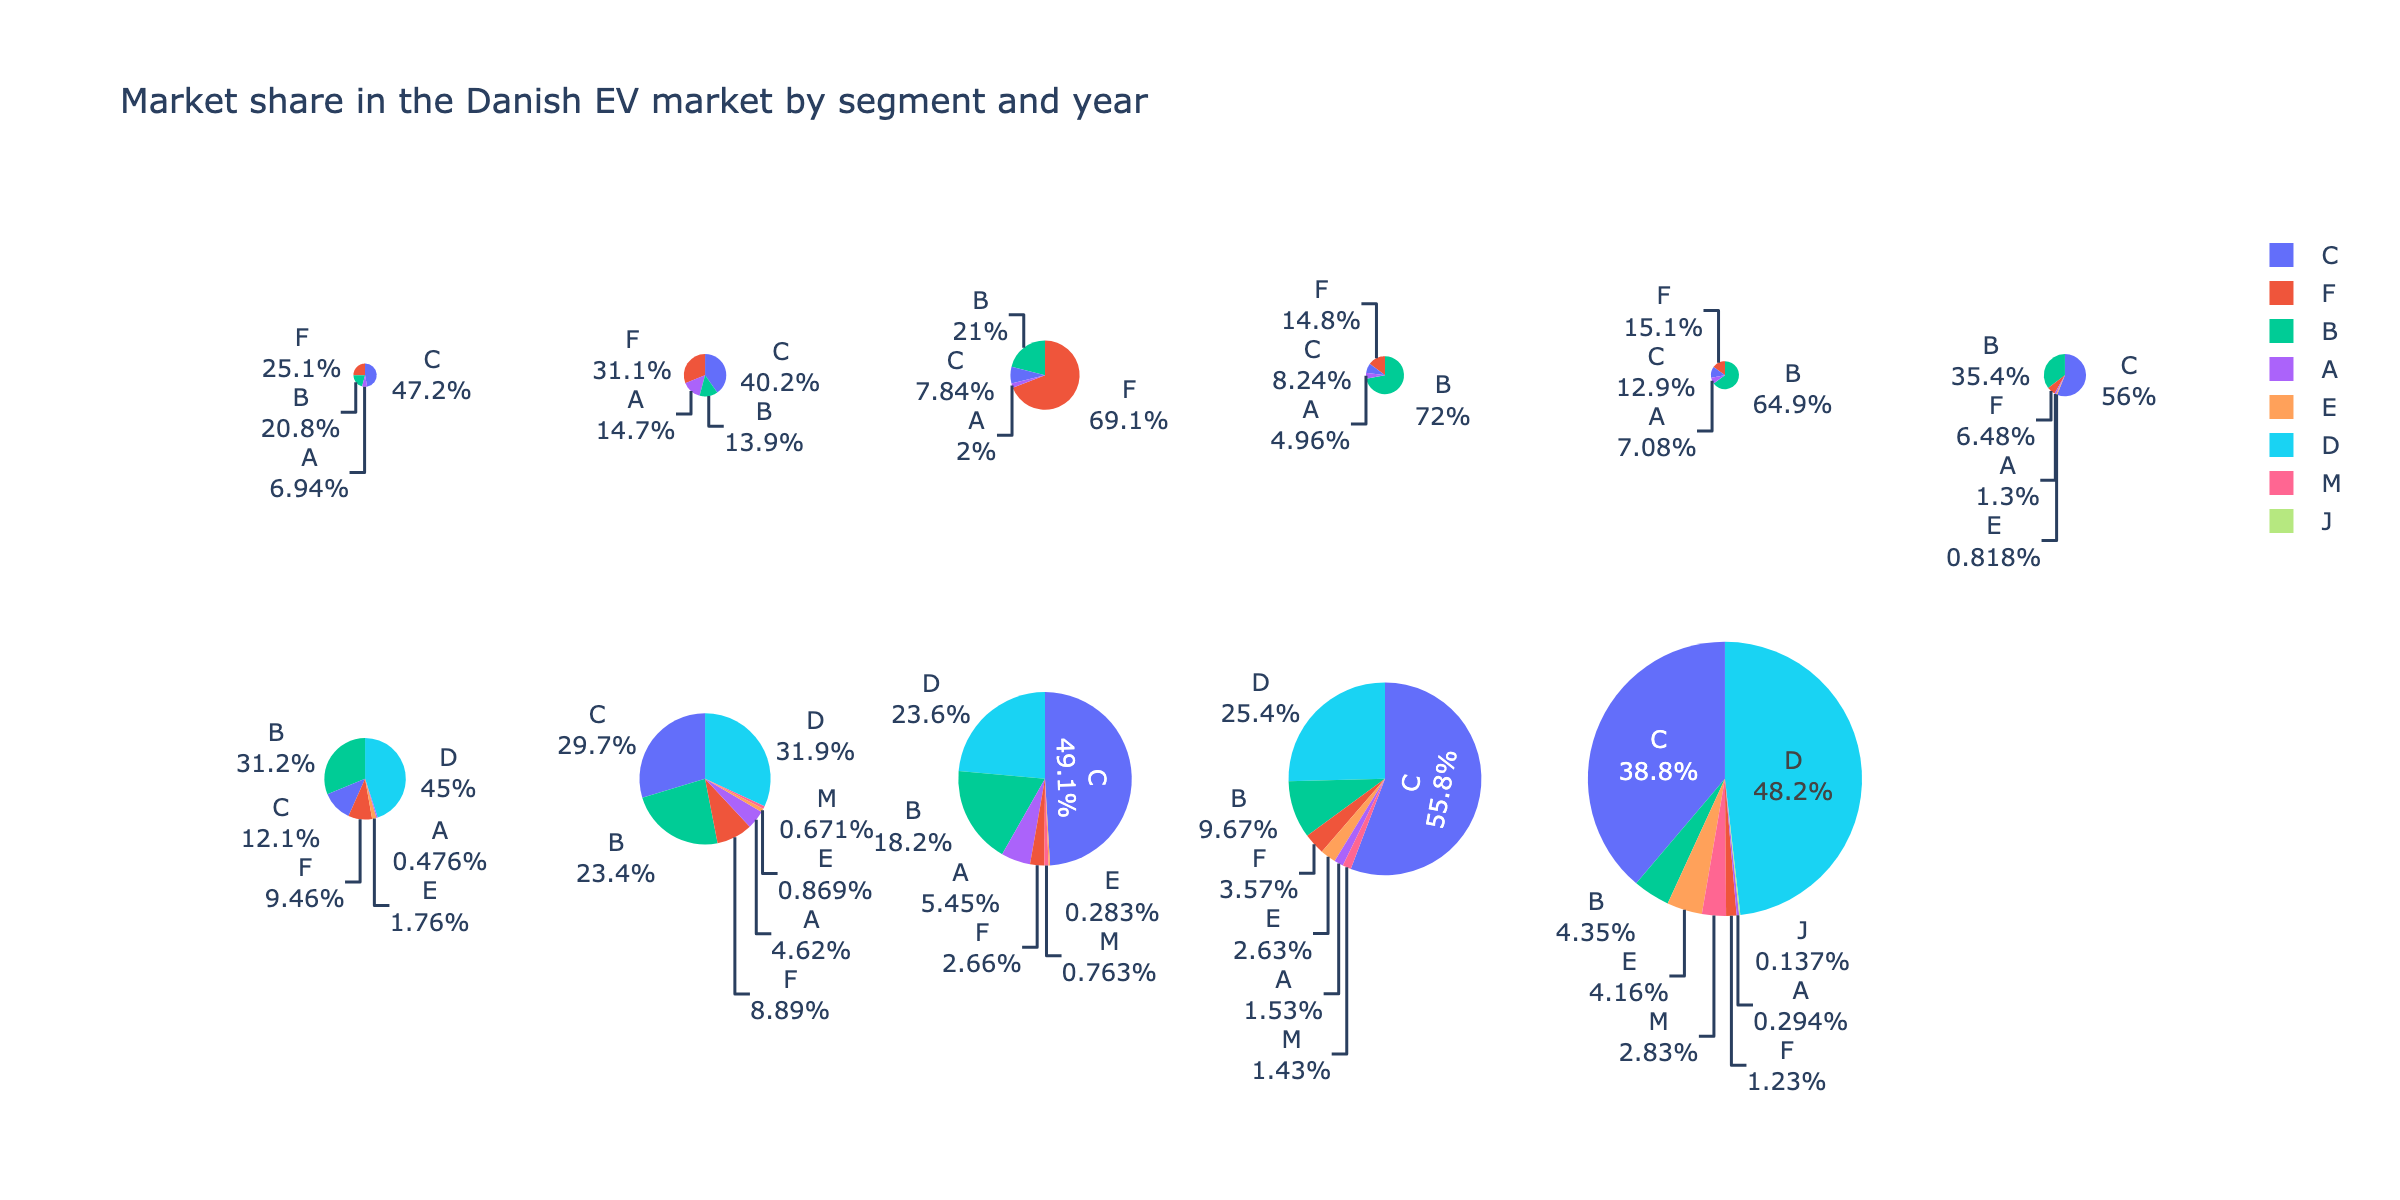

In [302]:
img_bytes = fig.to_image(format="png", width=1200, height=600, scale=2)
Image(img_bytes)